In [39]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [15]:
# creating sample data - x, y

xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

### Creating a Regression Model

In [16]:
# line of best fit calculation

def best_fit(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys))/
        ((mean(xs))**2 - mean((xs)**2)))
    b = mean(ys) - m*mean(xs)
    return m, b

In [24]:
# defining new slope and intercept using the function

m,b = best_fit(xs, ys)

# regression line using the slope and intercept that we've found

regression_line = [(m*x) + b for x in xs] 

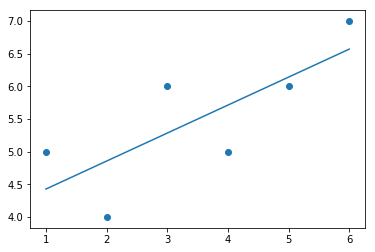

In [26]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)

### Making a prediction on this model

In [29]:
predict_x = 8 # predict y where x = 8
predict_y = (m*predict_x) + b
print(predict_y)

7.428571428571429


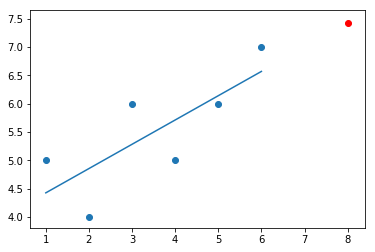

In [34]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x, predict_y, color='r')

### Calculating the R^2 value

In [35]:
# functions needed to calculate R^2

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_det(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [38]:
r_squared = coefficient_det(ys, regression_line)
print(r_squared)

0.5844155844155845


### Working with real data - testing 

In [40]:
# function that randomly generates data based on given correlation
# variables:
    # hm - how many
    # step - how far on average to step up y value per point
    # correlation - positive or negative, true false

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1 # starting value
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [60]:
# sample dataset

xs, ys = create_dataset(40, 20, correlation='pos')

0.8916019242815866


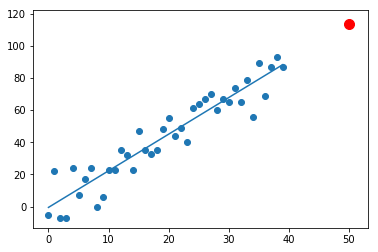

In [62]:
# applying line of best fit method

m,b = best_fit(xs, ys)
regression_line = [(m*x) + b for x in xs]

predict_x = 50 # predict y where x = 8
predict_y = (m*predict_x) + b

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x, predict_y, s=100, color='r')

r_squared = coefficient_det(ys, regression_line)
print(r_squared) # depends on the variance, as variance increases, R^2 decreases